<a href="https://colab.research.google.com/github/Attent1/CP2-IA/blob/main/CP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

# Bibliotecas para uso e visualização de dados
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import para divisão dos dados de treino e teste
from sklearn.model_selection import train_test_split

# Imports para preparação de dados
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Import de métricas para avaliação dos modelos
from sklearn.metrics import accuracy_score


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:

url = "/content/drive/MyDrive/solicitacoescredito.csv"
df = pd.read_csv(url)
df_sub = df[['razaoSocial','maiorAtraso', 'percentualProtestos', 'prazoMedioRecebimentoVendas', 'titulosEmAberto', 'valorSolicitado', 'percentualRisco', 'valorAprovado', 'ativoCirculante', 'passivoCirculante', 'totalAtivo', 'endividamento', 'duplicatasAReceber', 'faturamentoBruto', 'margemBruta', 'custos', 'restricoes', 'empresa_MeEppMei', 'scorePontualidade']]

# , 'intervaloFundacao'



In [20]:
df_filtrado = df_sub.dropna()

In [21]:
df_filtrado.head()

,razaoSocial,maiorAtraso,percentualProtestos,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,percentualRisco,valorAprovado,ativoCirculante,passivoCirculante,totalAtivo,endividamento,duplicatasAReceber,faturamentoBruto,margemBruta,custos,restricoes,empresa_MeEppMei,scorePontualidade
4,Nigel Lee,20,0.0,20,1486.95,50000.0,0.169811,50000.0,14758917.0,12149031.0,25793410.0,3039112.0,11797928.0,40779757.0,81459809.0,40680051.0,False,False,1.000000
7,Jean Berry,4,0.0,102,208980.00,300000.0,0.056604,300000.0,17801610.0,2538069.0,19415777.0,0.0,3742963.0,11958227.0,9357949.0,0.0,False,False,1.000000
8,Elliot Stephenson,43,0.0,27,6432.00,400000.0,0.113208,400000.0,36827690.0,13843198.0,39455945.0,0.0,15980275.0,72479551.0,6233236.0,-49267738.0,False,False,1.000000
14,Anthony Moore-Jones,4,0.0,0,0.00,200000.0,0.207547,200000.0,11780048.0,11680162.0,12582116.0,1567918.0,6873822.0,36783195.0,-312950.0,-25744597.0,False,False,1.000000
19,Brian Harris,5,0.0,0,0.00,2000000.0,0.113208,1600000.0,1164378.0,50773.0,1164378.0,0.0,0.0,57950454.0,18419747.0,39530707.0,False,False,0.999976


In [7]:
df_filtrado.isnull().sum()

razaoSocial                    0
maiorAtraso                    0
percentualProtestos            0
prazoMedioRecebimentoVendas    0
titulosEmAberto                0
valorSolicitado                0
percentualRisco                0
valorAprovado                  0
ativoCirculante                0
passivoCirculante              0
totalAtivo                     0
endividamento                  0
duplicatasAReceber             0
faturamentoBruto               0
margemBruta                    0
custos                         0
restricoes                     0
empresa_MeEppMei               0
scorePontualidade              0
dtype: int64

In [8]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3666 entries, 4 to 8961
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   razaoSocial                  3666 non-null   object 
 1   maiorAtraso                  3666 non-null   int64  
 2   percentualProtestos          3666 non-null   float64
 3   prazoMedioRecebimentoVendas  3666 non-null   int64  
 4   titulosEmAberto              3666 non-null   float64
 5   valorSolicitado              3666 non-null   float64
 6   percentualRisco              3666 non-null   float64
 7   valorAprovado                3666 non-null   float64
 8   ativoCirculante              3666 non-null   float64
 9   passivoCirculante            3666 non-null   float64
 10  totalAtivo                   3666 non-null   float64
 11  endividamento                3666 non-null   float64
 12  duplicatasAReceber           3666 non-null   float64
 13  faturamentoBruto       

In [9]:
df_filtrado.describe()

,maiorAtraso,percentualProtestos,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,percentualRisco,valorAprovado,ativoCirculante,passivoCirculante,totalAtivo,endividamento,duplicatasAReceber,faturamentoBruto,margemBruta,custos,scorePontualidade
count,3666.000000,3666.0,3666.000000,3.666000e+03,3.666000e+03,3666.000000,3.666000e+03,3.666000e+03,3.666000e+03,3.666000e+03,3.666000e+03,3.666000e+03,3.666000e+03,3.666000e+03,3.666000e+03,3666.000000
mean,28.181942,0.0,35.594926,1.154083e+05,7.669089e+05,0.227895,2.289342e+05,3.209251e+07,2.122430e+07,4.832888e+07,2.316366e+06,1.418570e+07,5.757868e+07,1.907211e+07,2.942692e+07,0.959084
std,70.740480,0.0,91.790392,2.927157e+05,2.215584e+07,0.115828,4.305107e+05,4.897002e+08,4.575493e+08,9.187844e+08,1.173065e+07,3.333077e+08,2.438610e+08,1.104843e+08,1.258278e+08,0.131702
min,0.000000,0.0,0.000000,0.000000e+00,1.000000e+02,0.000000,0.000000e+00,-1.700000e+01,-3.555090e+05,-1.700000e+01,0.000000e+00,-2.278071e+07,0.000000e+00,-6.148721e+08,-6.502270e+07,0.000000
25%,3.000000,0.0,0.000000,0.000000e+00,4.500000e+04,0.142857,3.000000e+04,8.395472e+05,1.669552e+05,9.962365e+05,0.000000e+00,2.660975e+04,2.213365e+06,1.616892e+05,9.629200e+04,0.991752
50%,8.000000,0.0,13.000000,1.064489e+04,9.300000e+04,0.214286,6.500000e+04,3.730912e+06,1.266682e+06,4.438074e+06,0.000000e+00,1.026750e+06,7.998607e+06,2.214811e+06,2.586619e+06,1.000000
75%,25.000000,0.0,42.000000,6.973500e+04,2.500000e+05,0.303571,2.000000e+05,1.470751e+07,6.960031e+06,1.830114e+07,5.900000e+05,6.010190e+06,2.831404e+07,8.882966e+06,1.476142e+07,1.000000
max,977.000000,0.0,1605.000000,2.836656e+06,1.200000e+09,0.641509,4.000000e+06,2.903832e+10,2.750382e+10,5.482350e+10,2.751270e+08,2.009358e+10,4.945926e+09,3.366843e+09,2.330486e+09,1.000000


In [10]:
df_filtrado.nunique()
#df_filtrado.drop_duplicates(inplace=True)

razaoSocial                    1167
maiorAtraso                     139
percentualProtestos               1
prazoMedioRecebimentoVendas     146
titulosEmAberto                 559
valorSolicitado                 236
percentualRisco                  68
valorAprovado                   218
ativoCirculante                1425
passivoCirculante              1424
totalAtivo                     1421
endividamento                   924
duplicatasAReceber             1321
faturamentoBruto               1783
margemBruta                    1448
custos                         1344
restricoes                        2
empresa_MeEppMei                  2
scorePontualidade               279
dtype: int64

In [11]:
df_filtrado = df_filtrado.drop(columns=["razaoSocial"])


In [12]:
correlation_matrix = df_filtrado.corr()

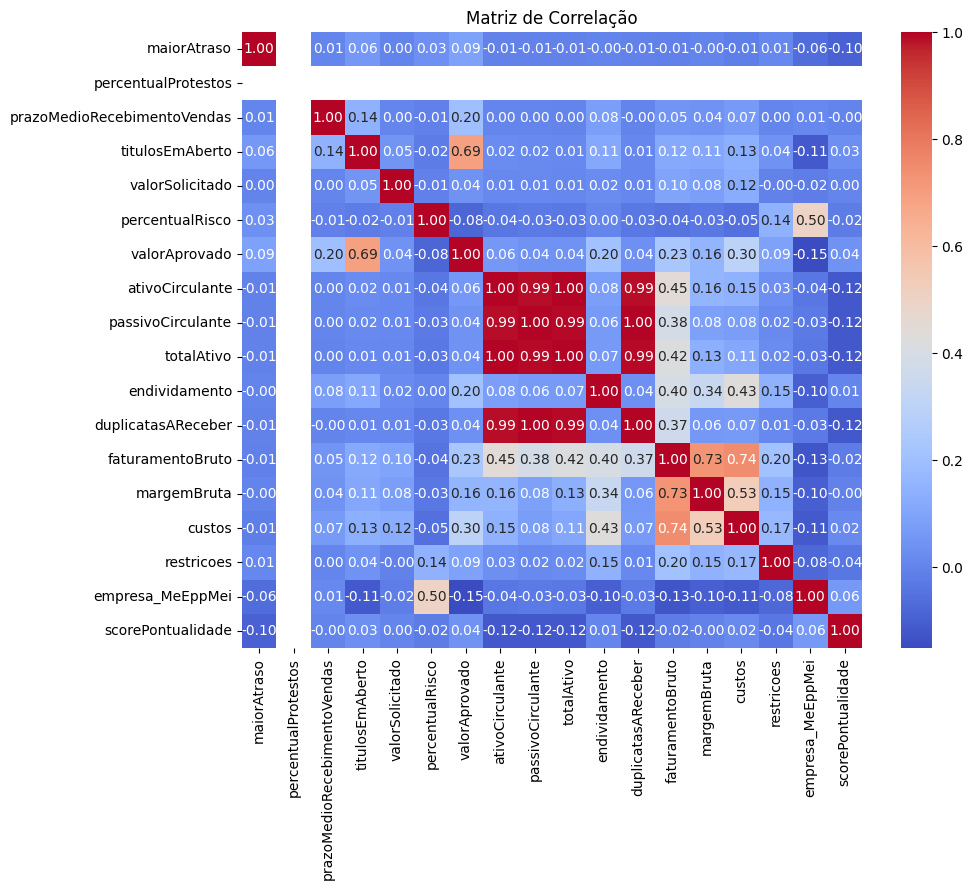

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

In [22]:
X = df_filtrado.drop(columns=["razaoSocial"])
y = df_filtrado["razaoSocial"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Padronização dos dados
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [24]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [25]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [26]:
y_pred = rf.predict(X_test)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo Random Forest: {:.2f}".format(accuracy))

Acurácia do modelo Random Forest: 0.79


In [28]:
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [ ]:
gbm.fit(X_train, y_train)

In [ ]:
y_pred = gbm.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo Gradient Boosting: {:.2f}".format(accuracy))

In [ ]:
import tensorflow as tf

# Cria o modelo de rede neural
# aqui devemos definir ao menos a quantidade de camadas, a quantidade de neuronios, o tipo de ativacao ...
model_rn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(428, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    tf.keras.layers.Dense(364, activation='relu',),
    tf.keras.layers.Dense(166, activation='relu',),
     tf.keras.layers.Dense(66, activation='relu',),
    tf.keras.layers.Dense(1)
])

# Compila o modelo
model_rn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Treina o modelo
historico_epochs = model_rn.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

# Fazendo as predições
y_pr = model_rn.predict(X_test_scaled)